<a href="https://colab.research.google.com/github/augmented-vr/Production/blob/master/Akari2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

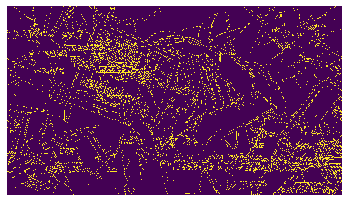

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import requests
import os

def clearLabel(_ax):
    _ax.tick_params(labelbottom='off',bottom='off')
    _ax.tick_params(labelleft='off',left='off')
    _ax.set_xticklabels([])
    _ax.axis('off')
    return _ax

def readImage(_filename):
  if os.path.exists(_filename):
    img = cv.imread(_filename)
    return img

response =requests.get('https://akari-mir.ai/wp-content/uploads/2018/05/85321ce1ab4f59ee8154fa7ae93d962e.jpg', allow_redirects=False)
if response.status_code != 200:
  e = Exception('HTTP status: ' + response.status_code)
  raise e

content_type = response.headers['content-type']
if 'image' not in content_type:
  e = Exception('Content-Type: ' + content_type)
  raise e

with open('akari.jpg','wb') as fout:
  fout.write(response.content)

img = readImage('akari.jpg')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
clearLabel(ax)
med_val = np.median(img)
lower = int(max(0,0.7 * med_val))
upper = int(min(255,1.3 * med_val))
blurred_img = cv.blur(img,ksize=(2,2))
#show_img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
#plt.imshow(show_img)
#flipEdges = cv.Canny(img,threshold1=127,threshold2=127)
flipEdges = cv.Canny(blurred_img,threshold1=lower,threshold2=upper)
plt.imshow(flipEdges)
